In [1]:
import pandas as pd

In [8]:
data = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [14]:
data_ru = data[data.Country == 'Russia']

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='dt', ylabel='AverageTemperature'>

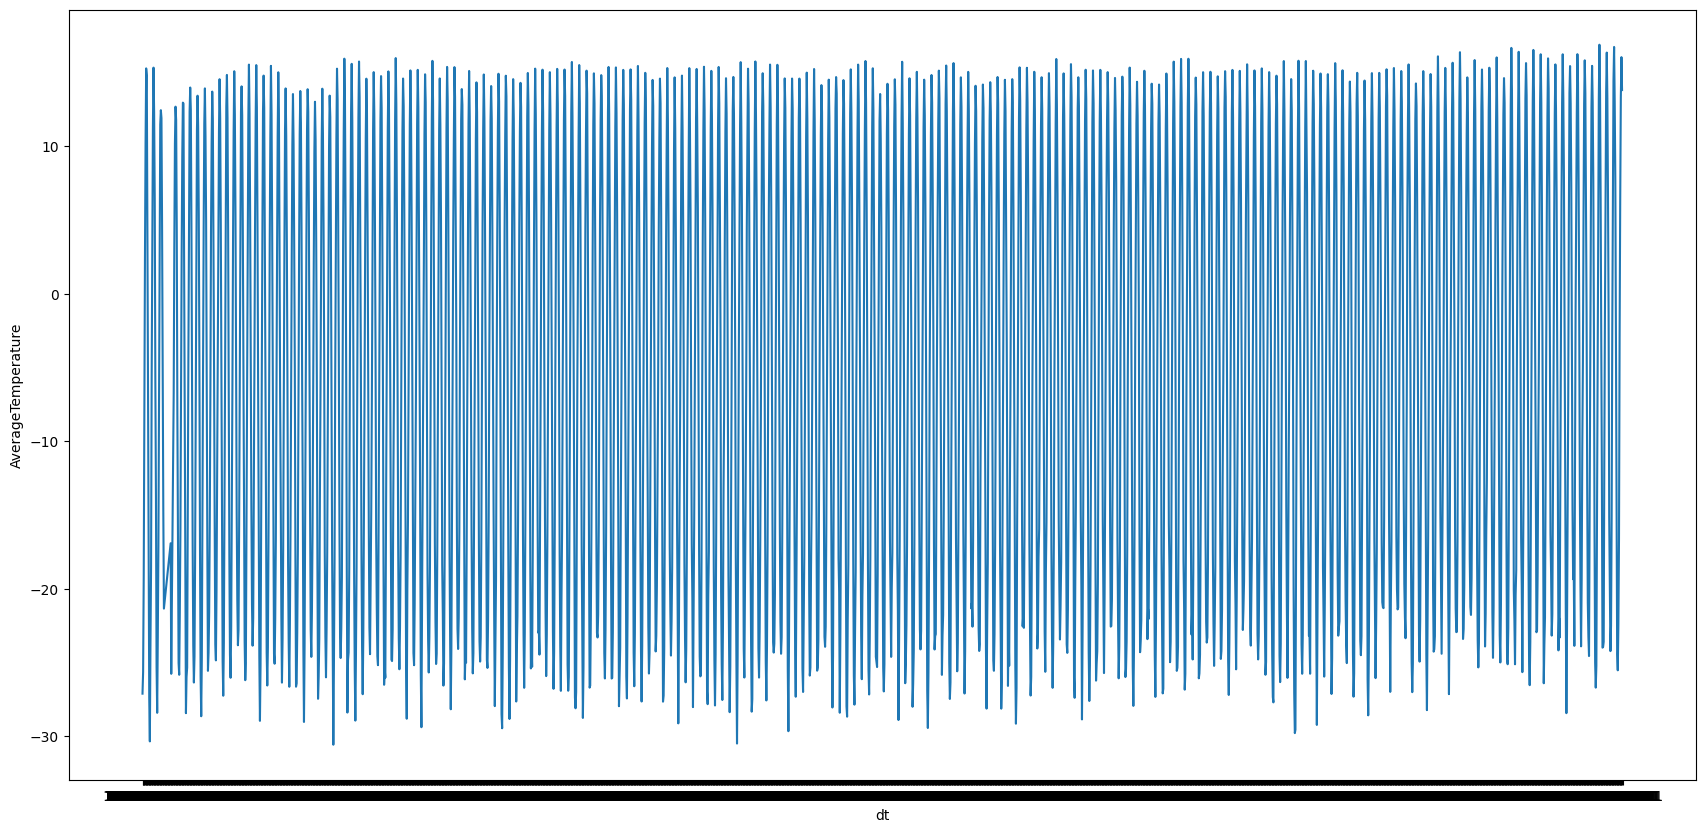

In [19]:
plt.figure(figsize=(21,10))
sns.lineplot(x=data_ru.dt, y=data_ru.AverageTemperature)
plt.show()

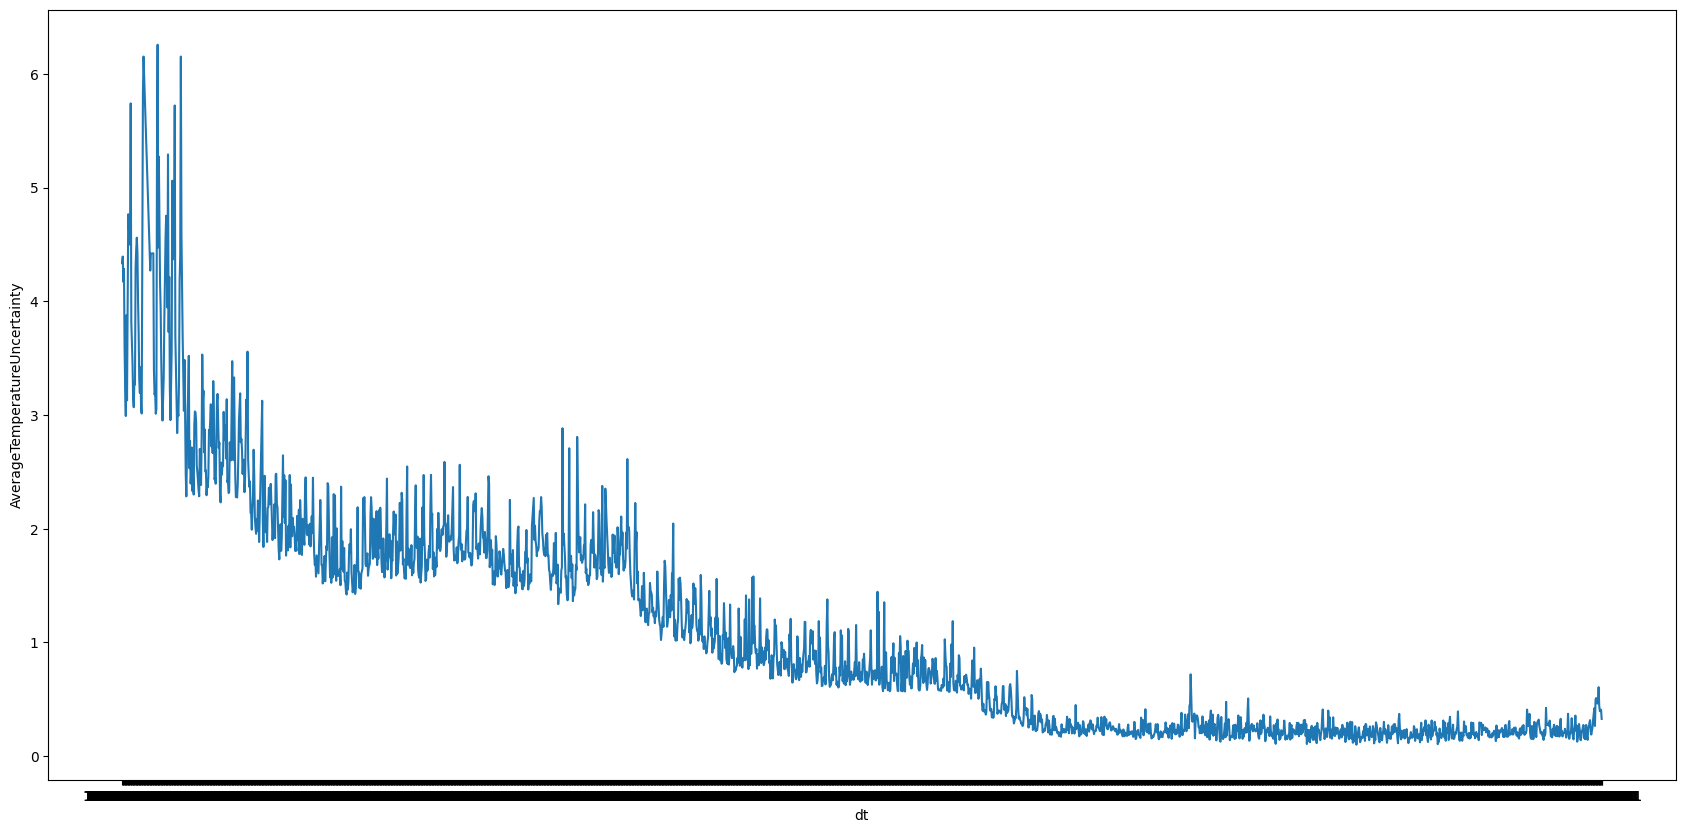

In [20]:
plt.figure(figsize=(21,10))
sns.lineplot(x=data_ru.dt, y=data_ru.AverageTemperatureUncertainty)
plt.show()

Временной ряд - последовательность значений наблюдаемых в различные временные отметки.

Он характеризуется тремя компонентами:
- Трендовая 
- Сезонная
- Остаток (шум)

Существует два основных типа моделей временных рядов:
- Аддитивная (суммируем три компонента)
- Мультипликативная (умножаем три компонента)

Для того чтобы выбрать какую модель использовать, нужно посмотреть как изменяется сезонная компонента по тренду.

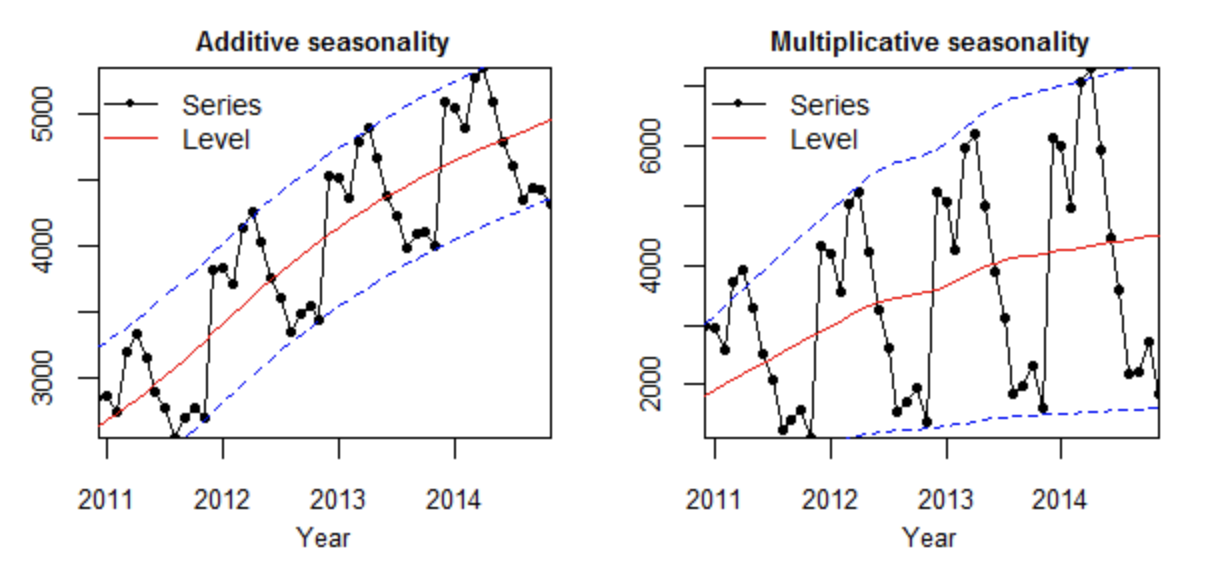

In [13]:
from IPython.display import Image
Image('photos/type.png') 

На картинке видно, что у мультипликативной модели сезонность изменяется по мере движения по тренду.

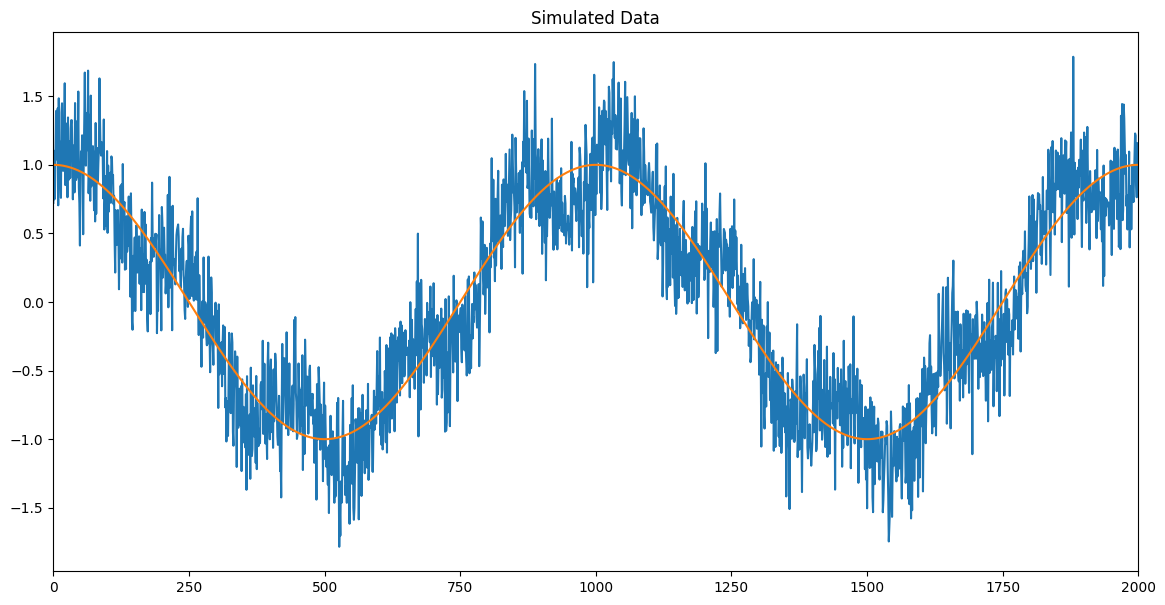

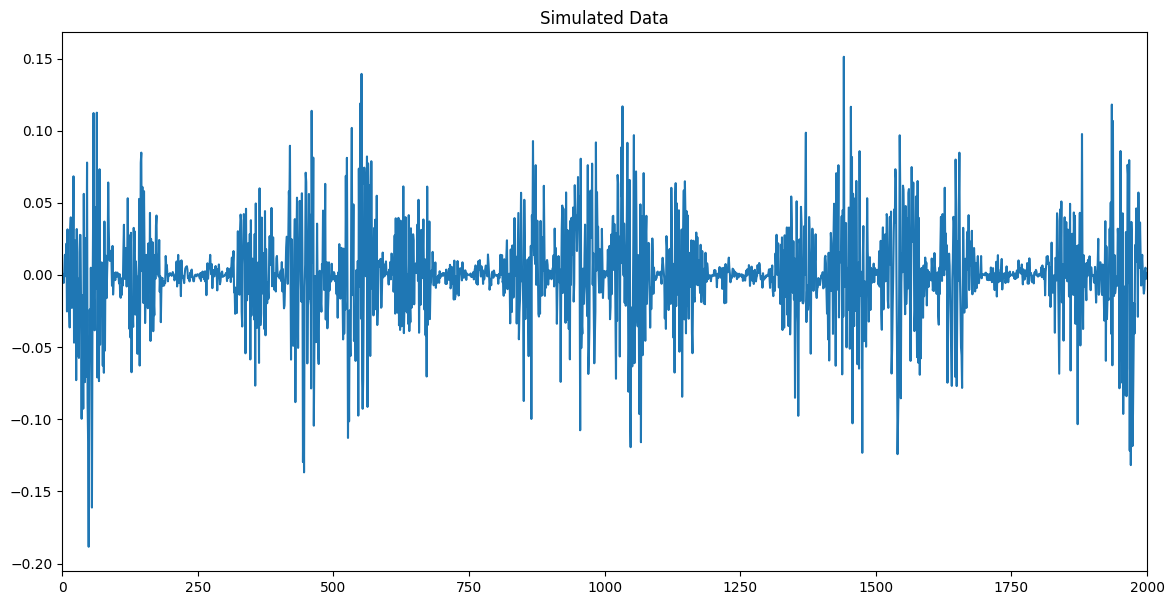

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


rs = np.random.RandomState(1009)

# задаем значения по x
x_max = 2000
xi = np.arange(x_max)

# тренд
trend = np.cos(xi / x_max * 4 * np.pi)

# сезонность
period = int(0.1 * x_max)
season = 0.25 * np.sin(xi / period * 2 * np.pi)

# ошибка
error = 0.25 * rs.standard_normal(x_max)

# аддитивный тип
y = trend + season + error

plt.figure(figsize=(14, 7))
plt.title("Simulated Data")
plt.plot(y)
plt.plot(trend)
plt.xlim(0, x_max)
plt.show()

# мультипликативный тип
y = trend * season * error

plt.figure(figsize=(14, 7))
plt.title("Simulated Data")
plt.plot(y)
plt.xlim(0, x_max)
plt.show()

Как раскладывается ряд на сезонные составляющие:

В аддитивной модели мы начинаем с вычисления тренда.

Линия тренда может, в зависимости от модели, быть:

- линейный: y = a t + b
- квадратичный / порядок 2: y = a t² + bt + c
- экспоненциальный: y = a exp (wt)
- ARIMA  : для нестационарных рядов.

Для сезонности цель состоит в том, чтобы найти закономерность, которая повторяется с временной частотой. Мы должны удалить составляющую тренда и различать период сезона и его причину.

Шум, в котором остаток - это то, что осталось после удаления тренда и сезонных компонентов. Обычно оценивается как  гауссовский белый шум  . 

Примечание.  Для мультипликативной модели мы можем уменьшить до аддитивной модели, взяв натуральный логарифм временного ряда и, таким образом, до его предыдущего разложения

Мультипликативную модель (6.2) логичнее использовать в ситуациях, когда амплитуда колебаний изменяется с течением времени. Такими свойствами, как правило, обладают развивающиеся экономические процессы.